## Netflix data Analysis And Visualization 

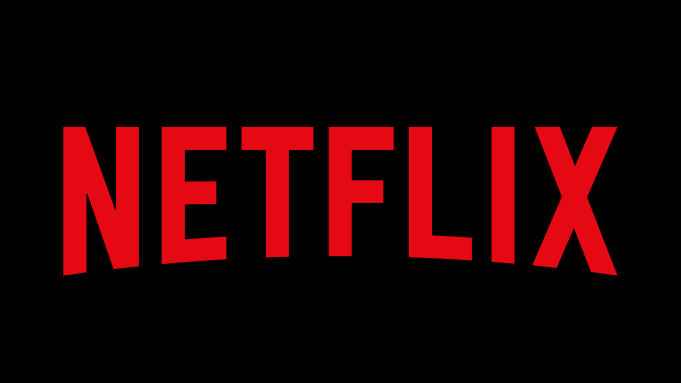

**Imports**

In [1]:
# Importing  neccesary library

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import datetime as dt

import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
pwd = os.getcwd()

In [3]:
#importing dataset
import_data= pd.read_csv(pwd + '\\netflix1.csv')
import_data

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


**Creating a Copy of imported data**

In [4]:
df = import_data.copy()

**Checking and treating Duplicates and null values**

In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [8]:
#changing datatype of date_added column to datetime
df["date_added"] = pd.to_datetime(df["date_added"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


**Adding month Day and year**

In [9]:
# adding a month_added column
df['month_added'] = df['date_added'].dt.month_name()
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,September
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",September
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",September
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",September
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",September


In [10]:
# also adding year_added and day_added column
df['year_added'] = df['date_added'].dt.year
df['day_added']=df['date_added'].dt.day_name()
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,month_added,year_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,September,2021,Saturday
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",September,2021,Friday
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",September,2021,Friday
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",September,2021,Wednesday
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",September,2021,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",January,2017,Tuesday
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,September,2018,Thursday
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",December,2016,Thursday
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,June,2018,Saturday


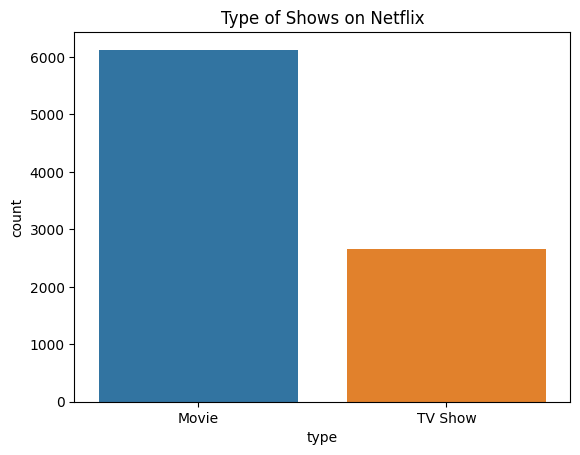

In [11]:
sns.countplot(df.type)
plt.title("Type of Shows on Netflix")
plt.show()

In [12]:
# Types of show on netflix

types = df['type'].value_counts().reset_index(name = 'count')
types

,index,count
0,Movie,6126
1,TV Show,2664


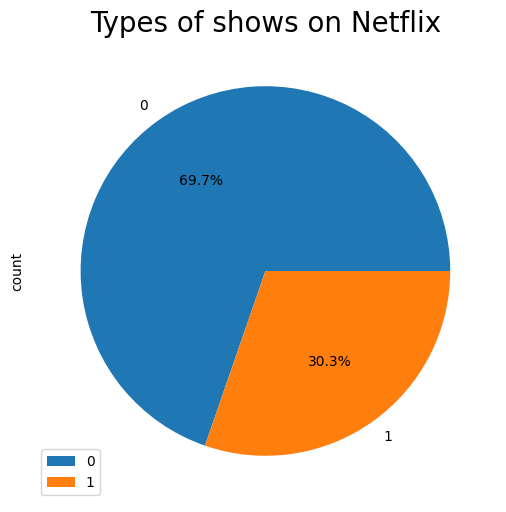

In [13]:
# percentage of types of show
types.plot.pie(y='count',autopct='%.1f%%', legend= 'index' , figsize=(6,6))
plt.title('Types of shows on Netflix', fontsize=20)
plt.show()

**A pie chart comparing Netflix movie uploads to TV show uploads from 2008 to 2021 reveals a 39.4% increase in movie uploads**

In [14]:
# Directors of show with type
director = df.groupby(['director','type'])['director'].count().reset_index(name='show_count')
director

,director,type,show_count
0,A. L. Vijay,Movie,2
1,A. Raajdheep,Movie,1
2,A. Salaam,Movie,1
3,A.R. Murugadoss,Movie,2
4,Aadish Keluskar,Movie,1
...,...,...,...
4576,Çagan Irmak,Movie,1
4577,Ísold Uggadóttir,Movie,1
4578,Óskar Thór Axelsson,Movie,1
4579,Ömer Faruk Sorak,Movie,2


In [15]:
#top 10 directors
top10_directors = director.sort_values(by = 'show_count', ascending = False).head(10)
top10_directors

,director,type,show_count
3101,Not Given,TV Show,2415
3100,Not Given,Movie,173
3432,Rajiv Chilaka,Movie,19
3484,"Raúl Campos, Jan Suter",Movie,18
4092,Suhas Kadav,Movie,16
2623,Marcus Raboy,Movie,15
127,Alastair Fothergill,TV Show,14
1803,Jay Karas,Movie,14
690,Cathy Garcia-Molina,Movie,13
4532,Youssef Chahine,Movie,12


In [16]:
# Total release with respect to contry and type
show_origin= df.groupby(['country','type'])[ 'type'].count().reset_index(name='show_count')
show_origin

,country,type,show_count
0,Argentina,Movie,56
1,Argentina,TV Show,20
2,Australia,Movie,61
3,Australia,TV Show,53
4,Austria,Movie,8
...,...,...,...
133,Uruguay,TV Show,1
134,Venezuela,Movie,2
135,Vietnam,Movie,7
136,West Germany,Movie,1


In [17]:
# top10 country
top10_country=show_origin.sort_values(by = 'show_count', ascending = False).head(10)
top10_country

,country,type,show_count
130,United States,Movie,2395
47,India,Movie,976
131,United States,TV Show,845
128,United Kingdom,Movie,387
87,Pakistan,TV Show,350
84,Not Given,Movie,257
129,United Kingdom,TV Show,251
15,Canada,Movie,187
60,Japan,TV Show,172
110,South Korea,TV Show,165


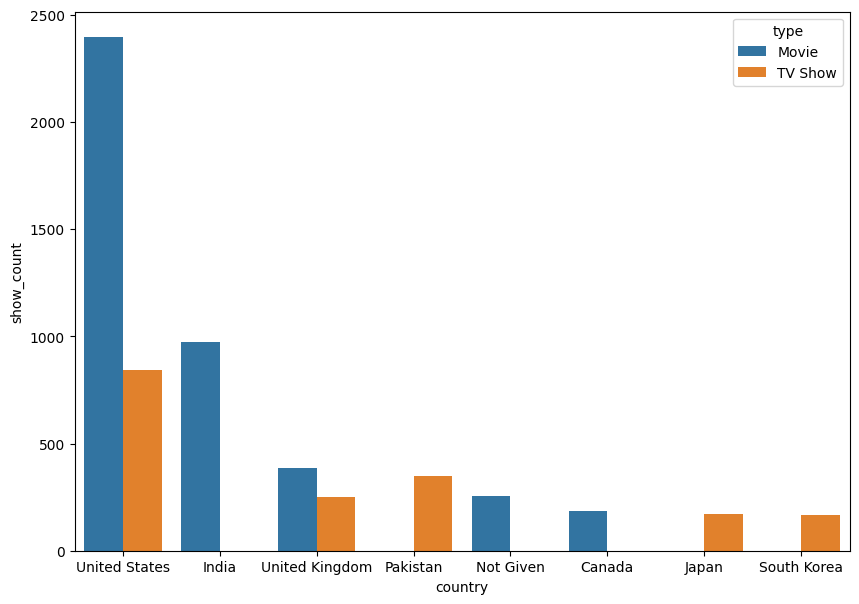

In [18]:
plt.figure(figsize = (10,7))
sns.barplot(x = top10_country['country'], y = show_origin['show_count'], hue = top10_country['type'])
plt.show()

**Netflix has the most movies from the United States, followed by India in second place and the United Kingdom in third place**

In [19]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,month_added,year_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,September,2021,Saturday
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",September,2021,Friday
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",September,2021,Friday
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",September,2021,Wednesday
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",September,2021,Friday


In [20]:
genre = df.groupby(['listed_in'])['show_id'].count().reset_index(name = "Total_release").sort_values(by='Total_release',ascending =False)
genre

,listed_in,Total_release
325,"Dramas, International Movies",362
273,Documentaries,359
469,Stand-Up Comedy,334
199,"Comedies, Dramas, International Movies",274
318,"Dramas, Independent Movies, International Movies",252
...,...,...
192,"Comedies, Cult Movies, Sci-Fi & Fantasy",1
190,"Comedies, Cult Movies, LGBTQ Movies",1
400,"International TV Shows, Spanish-Language TV Sh...",1
188,"Comedies, Cult Movies, Independent Movies",1


In [21]:
top10_genre = genre.head(10)
top10_genre

,listed_in,Total_release
325,"Dramas, International Movies",362
273,Documentaries,359
469,Stand-Up Comedy,334
199,"Comedies, Dramas, International Movies",274
318,"Dramas, Independent Movies, International Movies",252
421,Kids' TV,219
120,Children & Family Movies,215
124,"Children & Family Movies, Comedies",201
280,"Documentaries, International Movies",186
328,"Dramas, International Movies, Romantic Movies",180


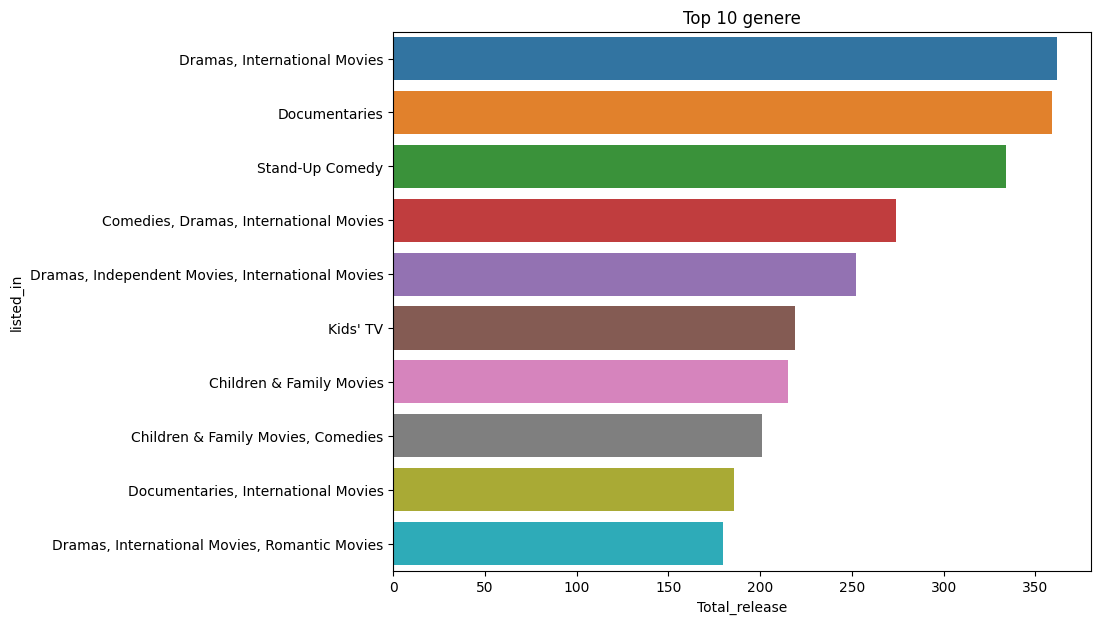

In [22]:
plt.figure(figsize = (9,7))
sns.barplot(y = 'listed_in' , x = 'Total_release', data = top10_genre)
plt.title("Top 10 genere")
plt.show()

**Netflix has the most titles in the "Dramas, International Movies" genre**

In [23]:
#different types of rating
df.rating.value_counts()

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

In [24]:
# total releases Ratings

rating_TV= df.groupby(['rating','type'])['rating'].count().reset_index(name='ratings_count')

rating_TV = rating_TV.sort_values(by = 'ratings_count', ascending =False)

rating_TV

,rating,type,ratings_count
12,TV-MA,Movie,2062
8,TV-14,Movie,1427
13,TV-MA,TV Show,1143
6,R,Movie,797
9,TV-14,TV Show,730
14,TV-PG,Movie,540
5,PG-13,Movie,490
15,TV-PG,TV Show,321
4,PG,Movie,287
19,TV-Y7,TV Show,194


Text(0.5, 1.0, 'Number of Shows With Each Rating')

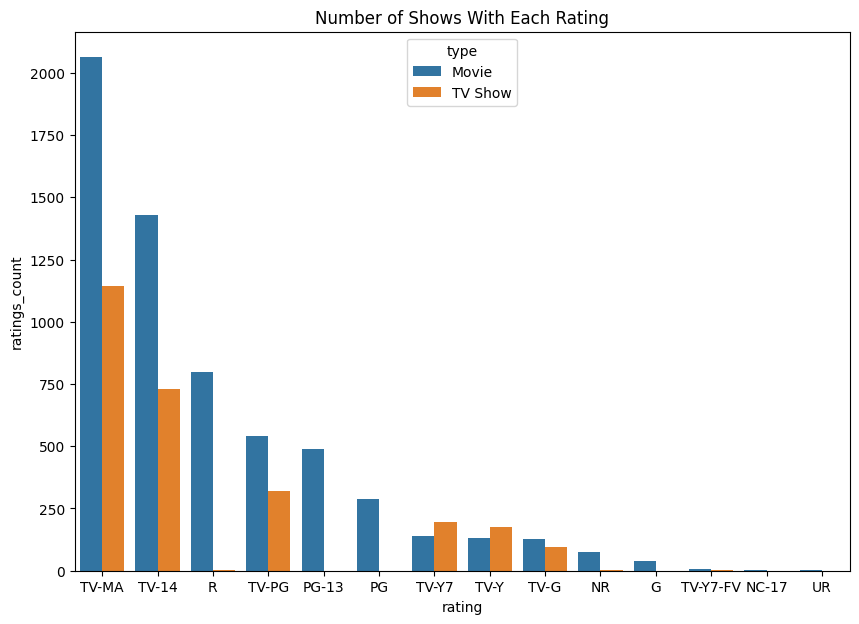

In [25]:
plt.figure(figsize = (10,7))
sns.barplot(x = 'rating' ,  y = 'ratings_count' , data = rating_TV, hue = 'type')
plt.title("Number of Shows With Each Rating")


* **TV-MA** ratings at Top, indicating that the majority of the shows are for mature audiences
* **TV-14** ratings coming in second. Parental Guidelines denotes content
* **R** rating at the third R classification denotes that the film is not suitable for minors to watch due to violence, offensive language, or sexual activity

In [26]:
# Lets Analyse Movies 

movies_df = df[df['type'] == 'Movie']
movies_df['duration'] = movies_df['duration'].str.replace(' min','')

In [27]:
movies_df.duration.describe().reset_index()

,index,duration
0,count,6126
1,unique,205
2,top,90
3,freq,152


In [28]:
movies_bymonth = movies_df.month_added.value_counts().reset_index().sort_values(by = 'month_added', ascending  =False)
movies_bymonth

,index,month_added
0,July,565
1,April,549
2,December,547
3,October,545
4,January,545
5,March,528
6,September,518
7,August,518
8,November,498
9,June,492


Text(0.5, 1.0, 'Total movies release each month')

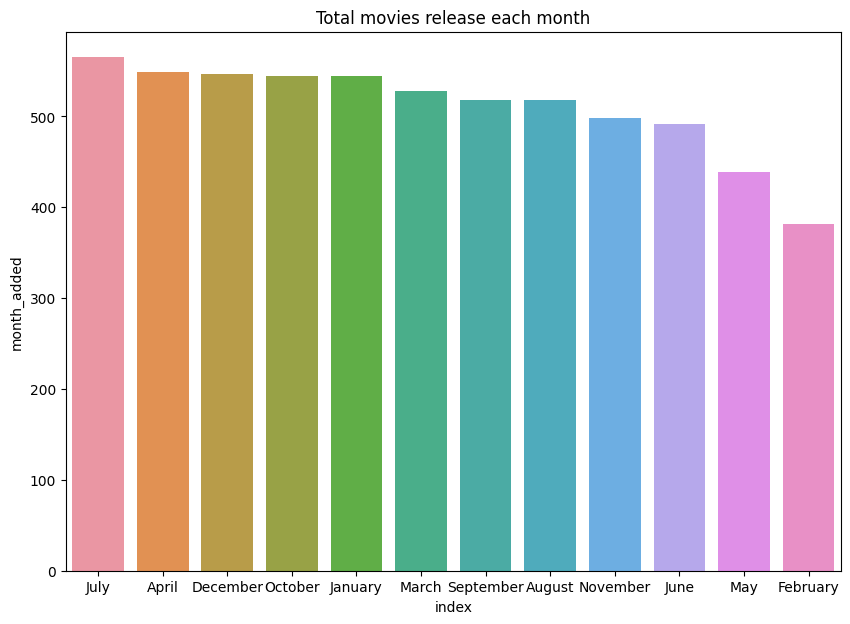

In [29]:
plt.figure(figsize = (10,7))
sns.barplot(x = 'index' ,  y = 'month_added' , data = movies_bymonth)
plt.title("Total movies release each month")

**The release month chart indicates that Netflix routinely releases new shows throughout the year**

In [30]:
# month wise total releases
release_month = df.groupby(['month_added','type'])['month_added'].count().reset_index(name = 'release_count').sort_values(by = 'month_added', ascending  =False)
release_month

,month_added,type,release_count
23,September,TV Show,251
22,September,Movie,518
21,October,TV Show,215
20,October,Movie,545
19,November,TV Show,207
18,November,Movie,498
17,May,TV Show,193
16,May,Movie,439
15,March,TV Show,213
14,March,Movie,528


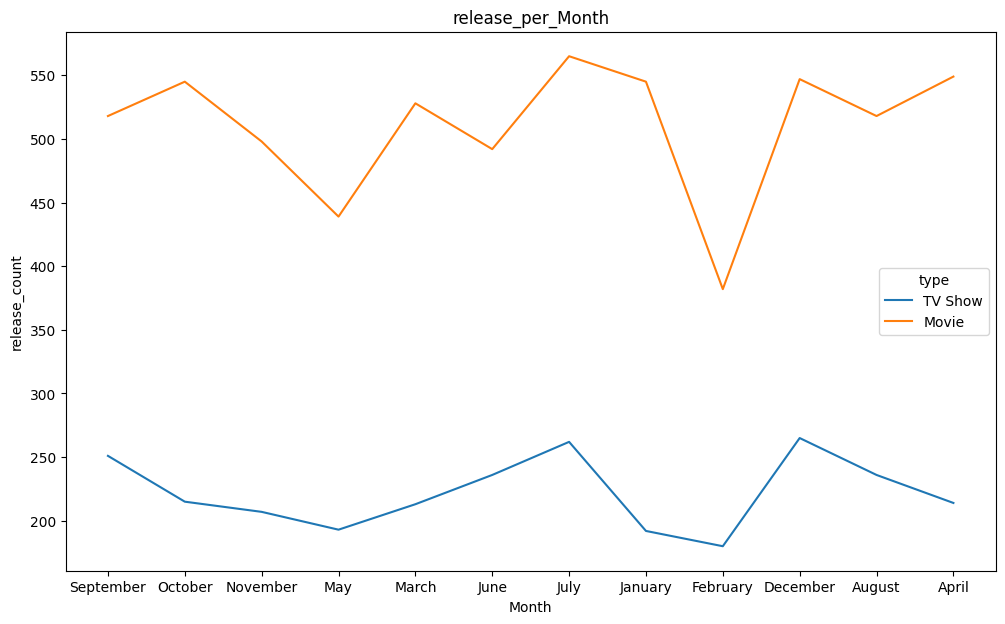

In [31]:
plt.figure(figsize = (12,7))
lineplot = sns.lineplot(x ="month_added", y ="release_count", hue="type" , data = release_month)

# add label to the axis and label to the plot
lineplot.set(xlabel ="Month", ylabel = "release_count", title ='release_per_Month')
plt.show()

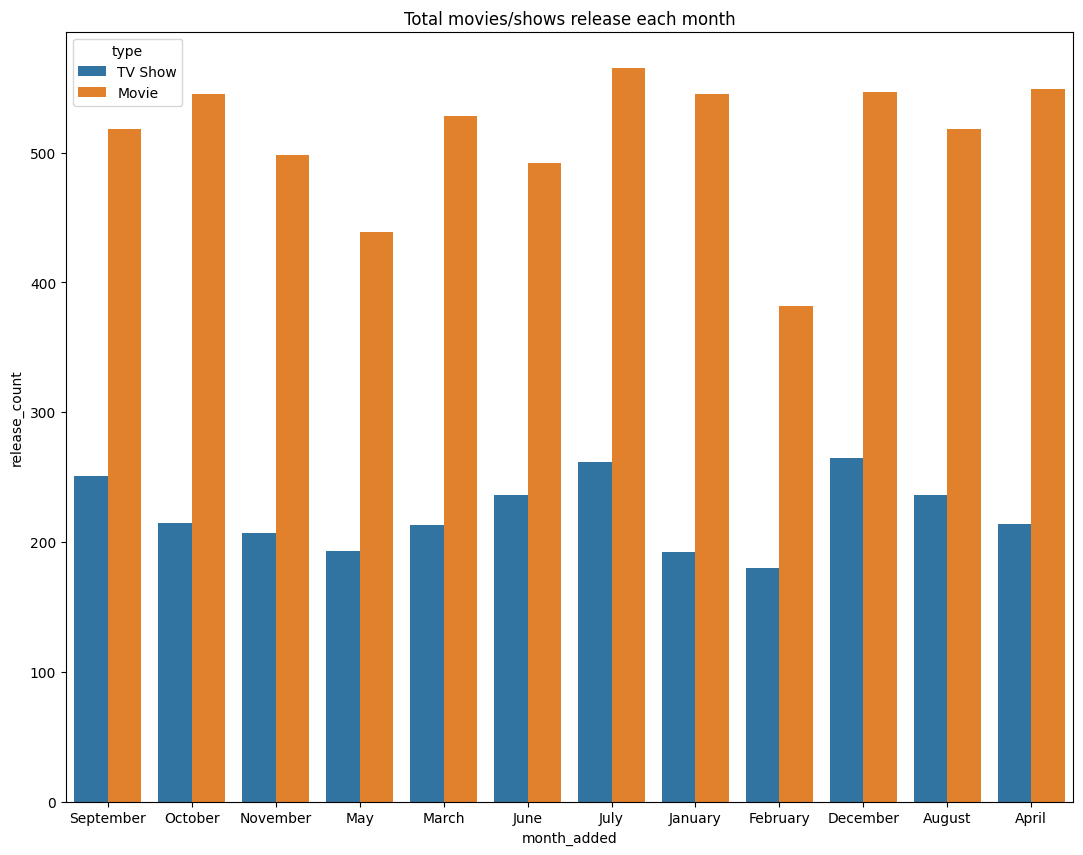

In [32]:
plt.figure(figsize = (13,10))
sns.barplot(x = 'month_added' ,  y = 'release_count' , data = release_month, hue = 'type')
plt.title("Total movies/shows release each month")
plt.show()

**There Approx Twice Number of movies wrt shows each month**

In [33]:
#yearwise total release
release_year= df.groupby(['year_added','type'])[ 'type'].count().reset_index(name='release_count').sort_values(by ='release_count')
release_year

,year_added,type,release_count
0,2008,Movie,1
1,2008,TV Show,1
3,2010,Movie,1
2,2009,Movie,2
5,2012,Movie,3
7,2013,TV Show,5
9,2014,TV Show,5
6,2013,Movie,6
4,2011,Movie,13
8,2014,Movie,19


Text(0.5, 1.0, 'Total movies/shows release each year')

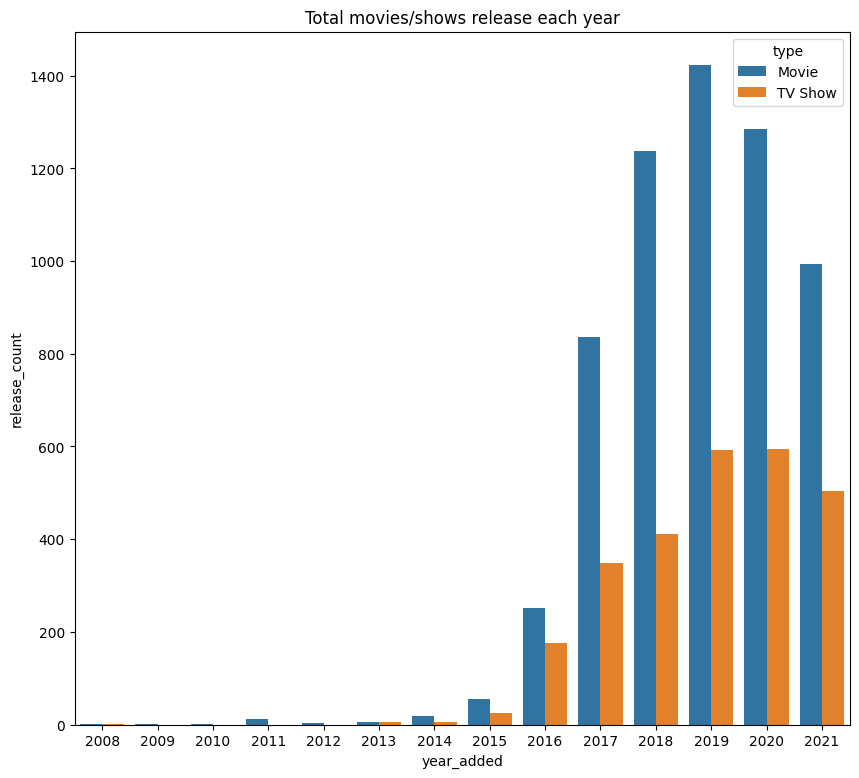

In [34]:
plt.figure(figsize = (10,9))
sns.barplot(x = 'year_added' ,  y = 'release_count' , data = release_year, hue = 'type')
plt.title("Total movies/shows release each year")

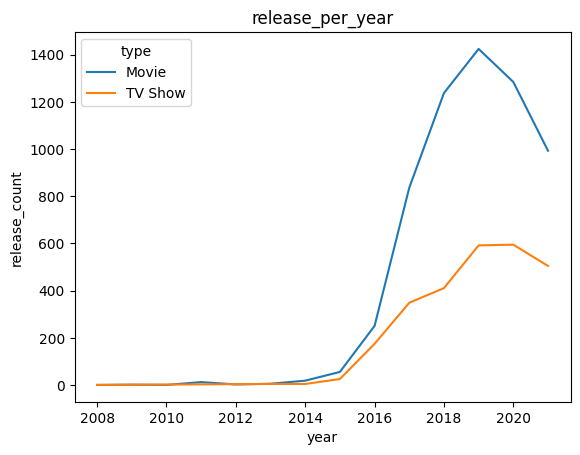

In [35]:
lineplot = sns.lineplot(x ="year_added", y ="release_count", hue="type" , data = release_year)

# add label to the axis and label to the plot
lineplot.set(xlabel ="year", ylabel = "release_count", title ='release_per_year')
plt.show()

**In the release per year linechart, we can observe that Netflix began to add shows in large quantities from 2015 onwards**

In [36]:
# Grouped by day_added and type
release_Day= df.groupby(['day_added','type'])['type'].count().reset_index(name='release_count')
release_Day

,day_added,type,release_count
0,Friday,Movie,1565
1,Friday,TV Show,932
2,Monday,Movie,627
3,Monday,TV Show,223
4,Saturday,Movie,557
5,Saturday,TV Show,259
6,Sunday,Movie,569
7,Sunday,TV Show,182
8,Thursday,Movie,1052
9,Thursday,TV Show,341


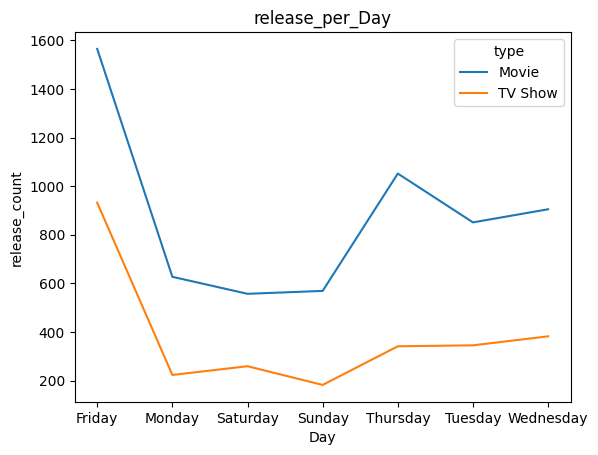

In [37]:
lineplot = sns.lineplot(x ="day_added", y ="release_count", hue="type" , data = release_Day)

# add label to the axis and label to the plot
lineplot.set(xlabel ="Day", ylabel = "release_count", title ='release_per_Day')
plt.show()

Text(0.5, 1.0, 'Total movies/shows release each day')

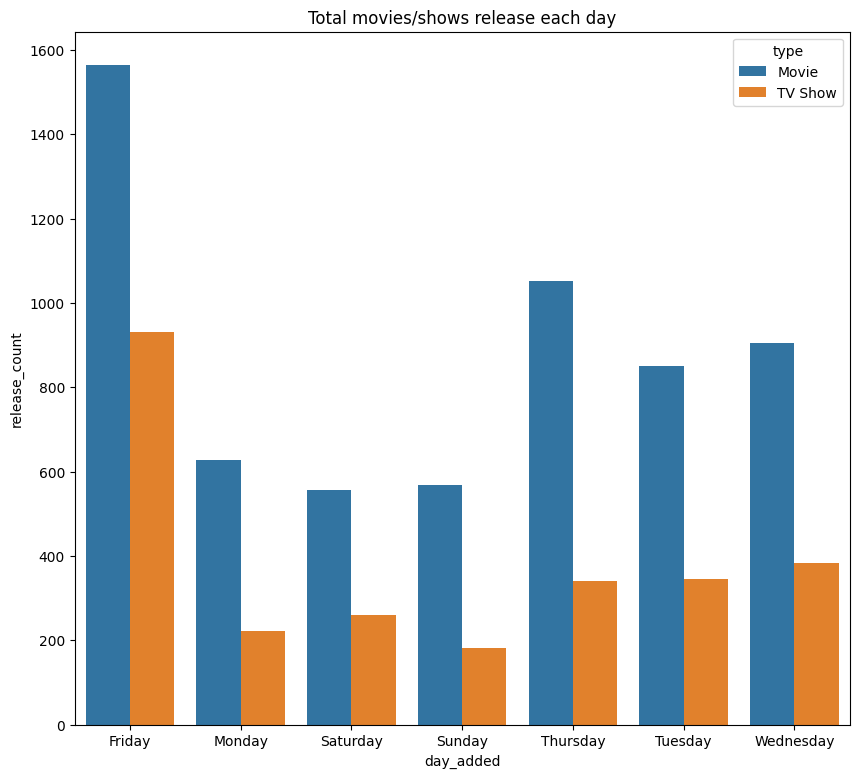

In [38]:
plt.figure(figsize = (10,9))
sns.barplot(x = 'day_added' ,  y = 'release_count' , data = release_Day, hue = 'type')
plt.title("Total movies/shows release each day")

**The majority of the shows and Movies on Netflix are released on Friday, as can be seen in the chart**

# Thank You